In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
import utils.anova_utils as anova_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from scripts.anova_analysis.run_anova import load_data
import scipy
import argparse
import copy
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import itertools

In [2]:
args = argparse.Namespace(
    **AnovaConfigs()._asdict()
)
args.conditions = ["Choice", "Response"]
args.window_size = 500

vars = ["Choice", "Response", "ChoiceResponse"]
sig_thresh = "95th"

### For choice/response and interaction, plot frac var and frac sig units per region

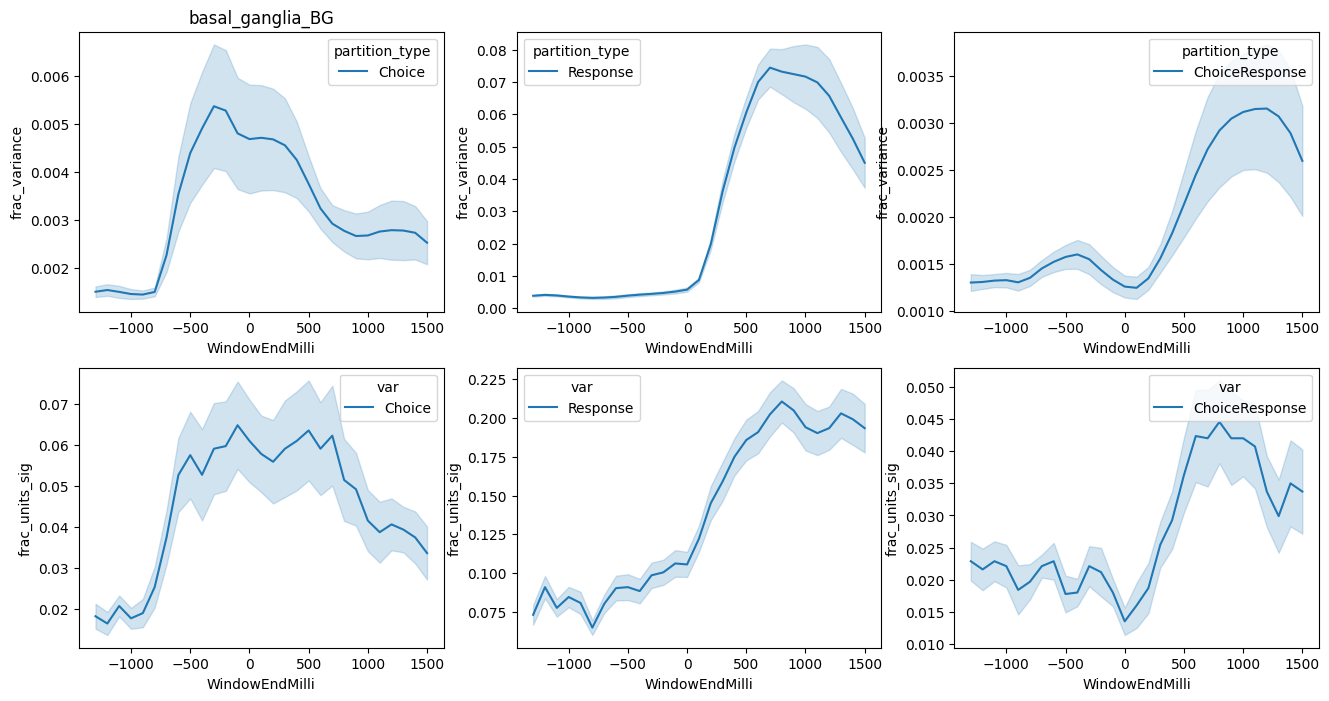

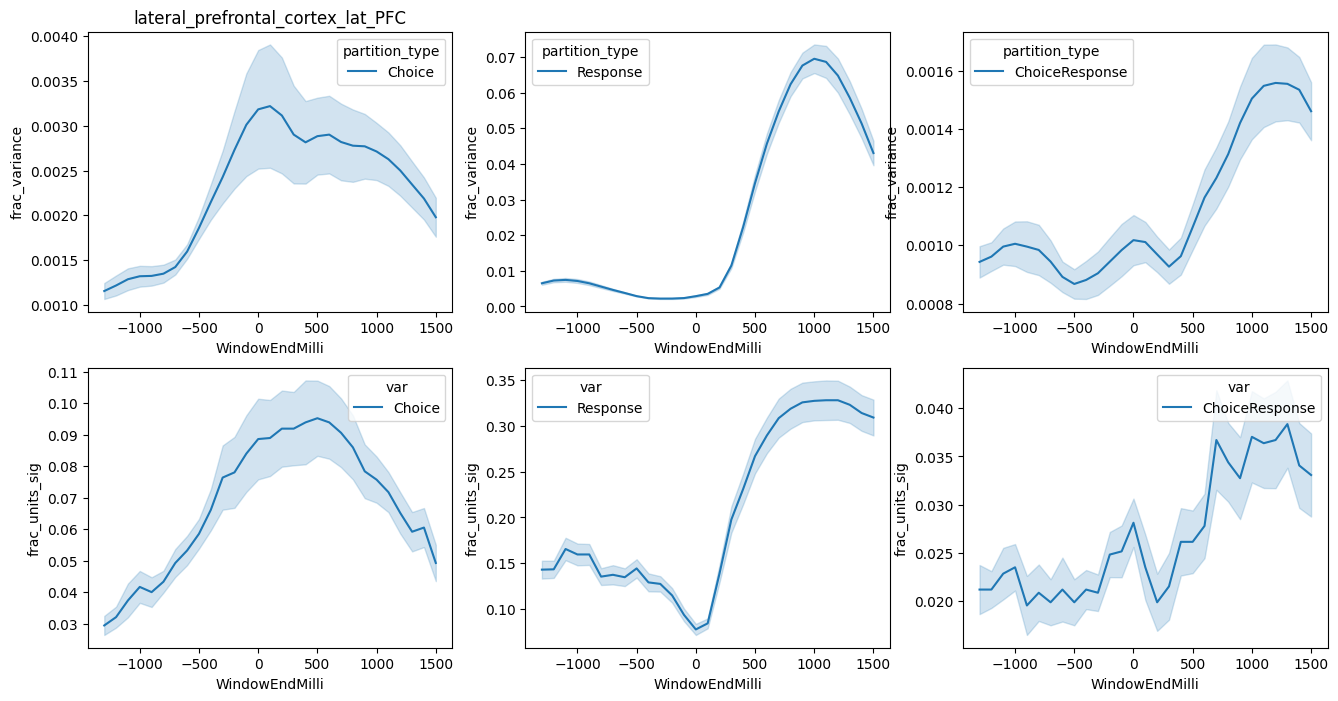

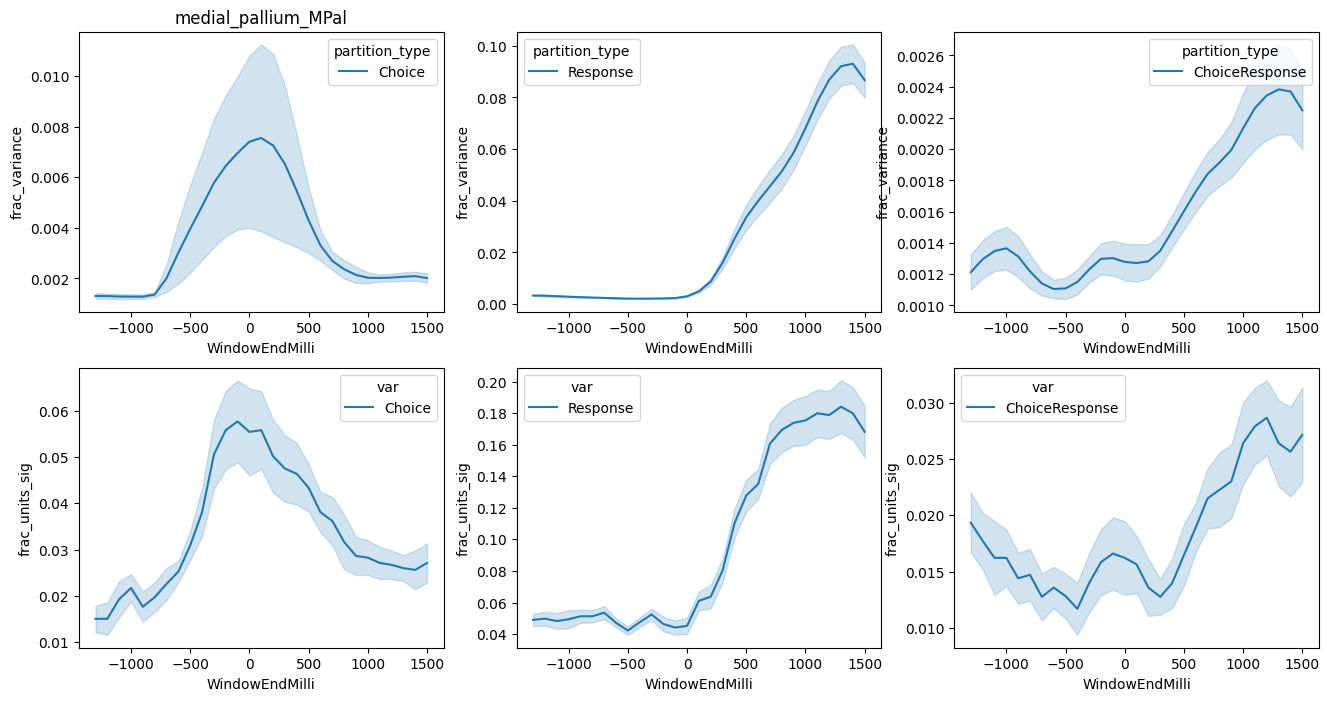

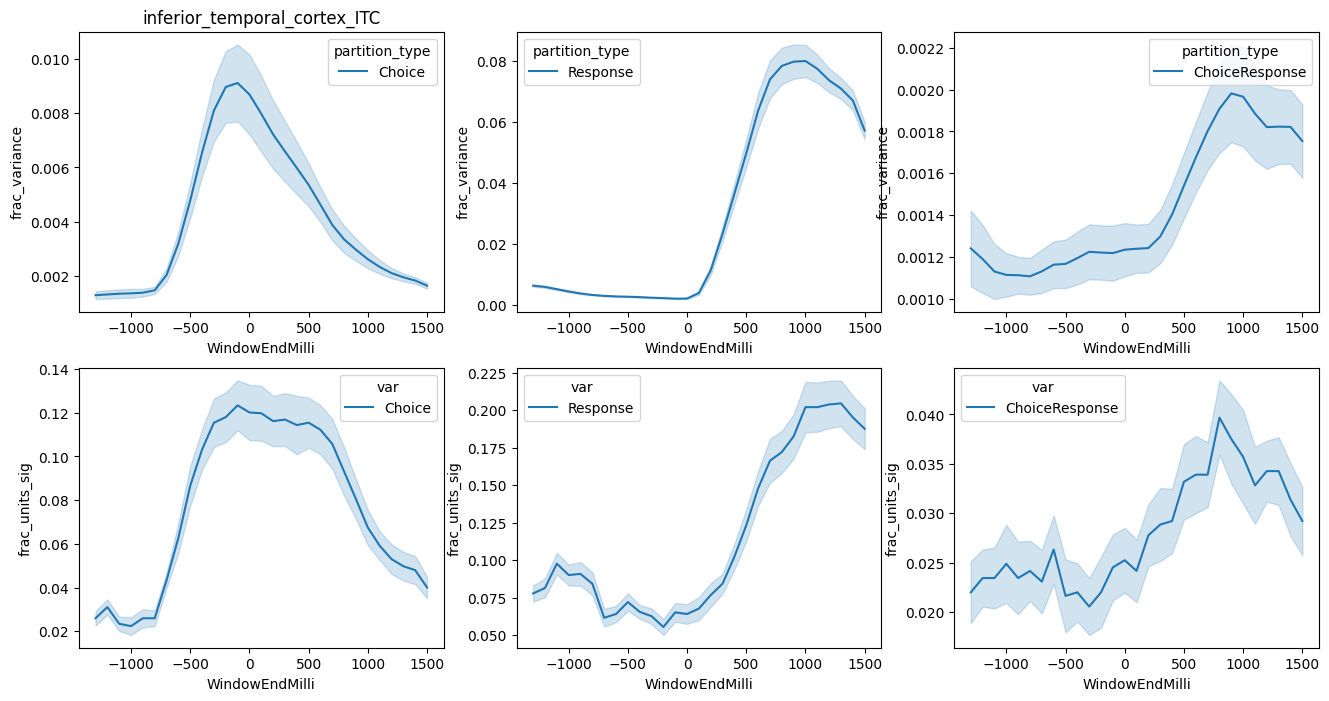

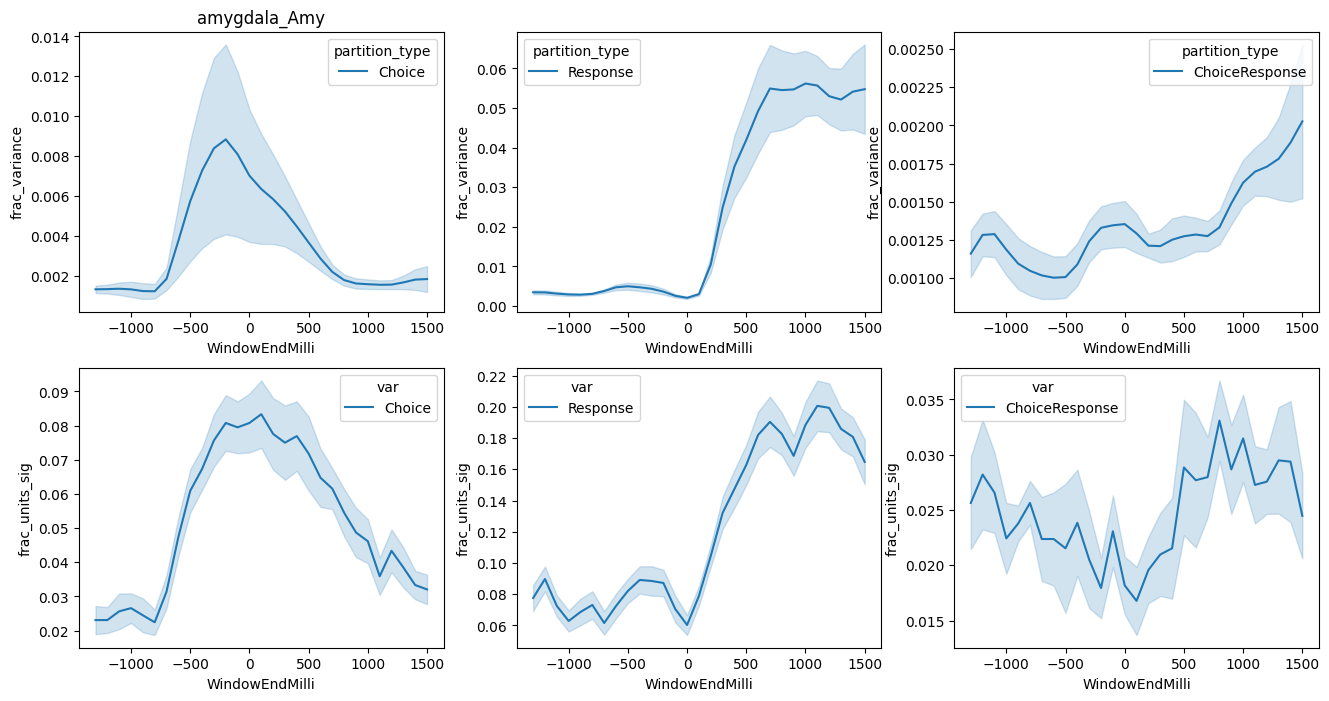

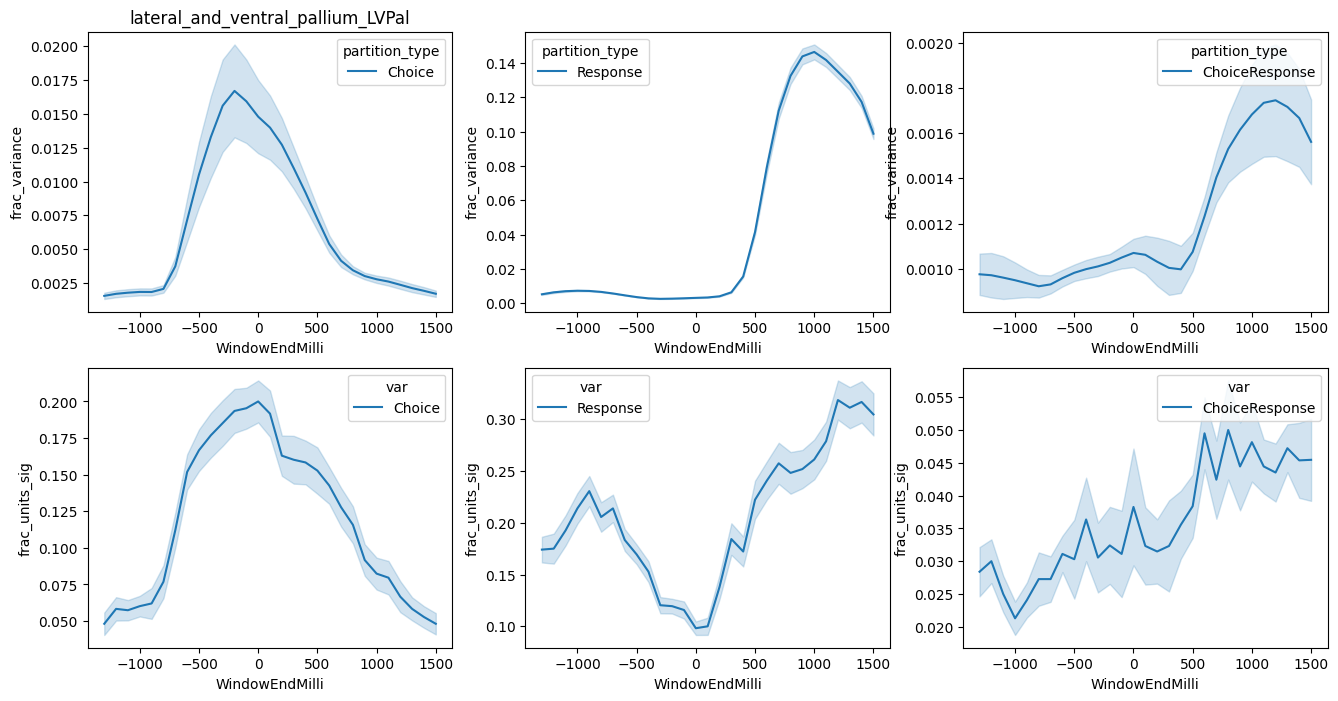

In [3]:

for region in ["basal_ganglia_BG", "lateral_prefrontal_cortex_lat_PFC", "medial_pallium_MPal", "inferior_temporal_cortex_ITC", "amygdala_Amy", "lateral_and_ventral_pallium_LVPal"]:
    region_units = spike_utils.get_all_region_units("structure_level2_cleaned", region, filter_drift=True)
    frac_vars = anova_utils.frac_var_explained_by_time(args, vars=vars, trial_events=["FeedbackOnsetLong"], units=region_units)
    num_sig_units = anova_utils.num_sig_units_by_time(args, vars, sig_thresh, trial_events=["FeedbackOnsetLong"], units=region_units)
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))
    for i, var in enumerate(vars):
        sub_frac_vars = frac_vars[frac_vars.partition_type == var]
        sub_sig_units = num_sig_units[num_sig_units["var"] == var]
        sns.lineplot(sub_frac_vars, x="WindowEndMilli", y="frac_variance", errorbar="se", hue="partition_type", ax=axs[0, i])
        sns.lineplot(sub_sig_units, x="WindowEndMilli", y="frac_units_sig", errorbar="se", hue="var", ax=axs[1, i])

    axs[0, 0].set_title(region)


### For choice/response interaction plot regions side by side

<Axes: xlabel='WindowEndMilli', ylabel='frac_units_sig'>

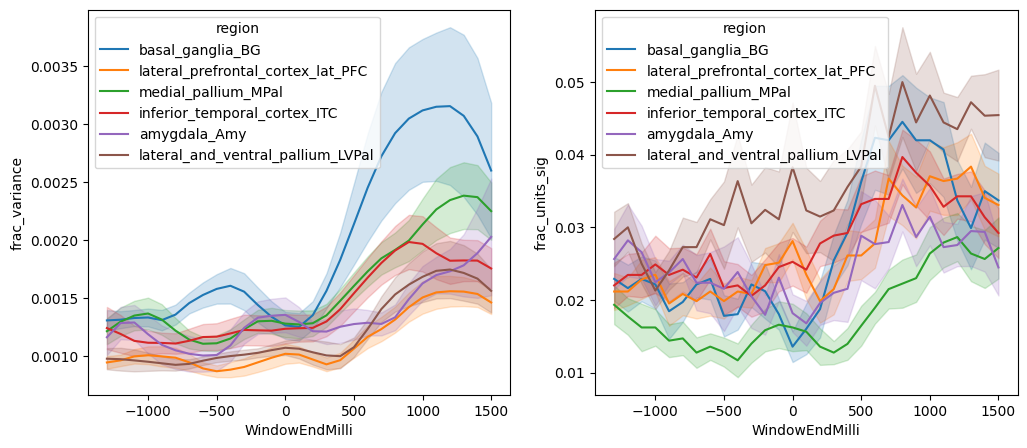

In [18]:

frac_var_res = []
sig_units_res = []
for region in ["basal_ganglia_BG", "lateral_prefrontal_cortex_lat_PFC", "medial_pallium_MPal", "inferior_temporal_cortex_ITC", "amygdala_Amy", "lateral_and_ventral_pallium_LVPal"]:
    region_units = spike_utils.get_all_region_units("structure_level2_cleaned", region, filter_drift=True)
    frac_vars = anova_utils.frac_var_explained_by_time(args, vars=["ChoiceResponse"], trial_events=["FeedbackOnsetLong"], units=region_units)
    frac_vars["region"] = region
    frac_var_res.append(frac_vars)

    num_sig_units = anova_utils.num_sig_units_by_time(args, vars=["ChoiceResponse"], sig_thresh=sig_thresh, trial_events=["FeedbackOnsetLong"], units=region_units)
    num_sig_units["region"] = region
    sig_units_res.append(num_sig_units)

frac_var_res = pd.concat(frac_var_res)
sig_units_res = pd.concat(sig_units_res)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(frac_var_res, x="WindowEndMilli", y="frac_variance", hue="region", errorbar="se", ax=ax1)
sns.lineplot(sig_units_res, x="WindowEndMilli", y="frac_units_sig", hue="region", errorbar="se", ax=ax2)



### per region, (or as a whole) report number of interaction selective units in total:

In [16]:
# num_sig_units = anova_utils.num_sig_units_by_time(args, ["ChoiceResponse"], sig_thresh, trial_events=["FeedbackOnsetLong"])
res = io_utils.read_anova_good_units(args, sig_thresh, "ChoiceResponse")

In [17]:
res.groupby("feat").PseudoUnitID.nunique()

feat
CIRCLE      293
CYAN        271
ESCHER      192
GREEN       239
MAGENTA     266
POLKADOT    215
RIPPLE      213
SQUARE      293
STAR        181
SWIRL       172
TRIANGLE    160
YELLOW      303
Name: PseudoUnitID, dtype: int64